### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)

In [3]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
Application_type_counts = application_df.APPLICATION_TYPE.value_counts()
Application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

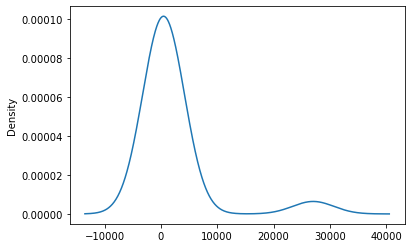

In [6]:
# Visualize the value counts of APPLICATION_TYPE
Application_type_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(Application_type_counts[Application_type_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C5200        1
C2500        1
C4500        1
C1900        1
C8210        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C4100        6
C1720        6
C1257        5
C1600        5
C0           3
C2710        3
C1260        3
C1234        2
C1256        2
C1246        2
C1267        2
C3200        2
C3700        1
C1370        1
C1236        1
C2600        1
C1820        1
C2380        1
C2150        1
C2170        1
C2561        1
C2570        1
C1248        1
C4200        1
C1580        1
C1245        1
C1728        1
C4120        1
C1283        1
C1570        1
C2190        1
C1732        1
C6100        1
C5200     

<AxesSubplot:ylabel='Density'>

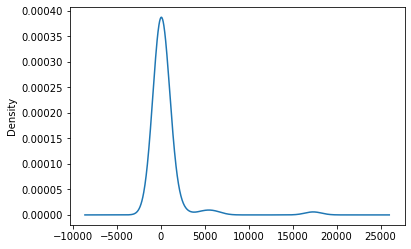

In [10]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          10
AFFILIATION                6
CLASSIFICATION             8
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

In [14]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(application_df.columns)

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'APPLICATION_TYPE_T9',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100',
       'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-2499

In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL",], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layers1 = 24
hidden_nodes_layers2 = 12
nn = tf.keras.models.Sequential()

#First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layers1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers2, activation="relu"))

#Output later
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1128      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
 80/804 [=>............................] - ETA: 0s - loss: 0.6923 - accuracy: 0.5728  
Epoch 00001: saving model to checkpoints\weights.01.hdf5
198/804 [======>.......................] - ETA: 0s - loss: 0.6637 - accuracy: 0.6158
Epoch 00001: saving model to checkpoints\weights.01.hdf5
259/804 [========>.....................] - ETA: 0s - loss: 0.6533 - accuracy: 0.6299
Epoch 00001: saving model to checkpoints\weights.01.hdf5
389/804 [=============>................] - ETA: 0s - loss: 0.6369 - accuracy: 0.6505
Epoch 00001: saving model to checkpoints\weights.01.hdf5
449/804 [===============>..............] - ETA: 0s - loss: 0.6311 - accuracy: 0.6574
Epoch 00001: saving model to checkpoints\weights.01.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.6214 - accuracy: 0.6683
Epoch 00001: saving model to checkpoints\weights.01.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6181 - accuracy: 0.6718
Epoch 00001: saving model to checkpoints\weights.

507/804 [=================>............] - ETA: 0s - loss: 0.5540 - accuracy: 0.7273
Epoch 00007: saving model to checkpoints\weights.07.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5525 - accuracy: 0.7283
Epoch 00007: saving model to checkpoints\weights.07.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5520 - accuracy: 0.7287
Epoch 00007: saving model to checkpoints\weights.07.hdf5
804/804 [==============================] - 1s 788us/step - loss: 0.5515 - accuracy: 0.7291
Epoch 8/100
  1/804 [..............................] - ETA: 1s - loss: 0.5470 - accuracy: 0.7500
Epoch 00008: saving model to checkpoints\weights.08.hdf5
155/804 [====>.........................] - ETA: 0s - loss: 0.5415 - accuracy: 0.7372
Epoch 00008: saving model to checkpoints\weights.08.hdf5
215/804 [=======>......................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7380
Epoch 00008: saving model to checkpoints\weights.08.hdf5
356/804 [============>.................] - ET

146/804 [====>.........................] - ETA: 0s - loss: 0.5581 - accuracy: 0.7187
Epoch 00014: saving model to checkpoints\weights.14.hdf5
209/804 [======>.......................] - ETA: 0s - loss: 0.5543 - accuracy: 0.7229
Epoch 00014: saving model to checkpoints\weights.14.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 0.5527 - accuracy: 0.7248
Epoch 00014: saving model to checkpoints\weights.14.hdf5
427/804 [==============>...............] - ETA: 0s - loss: 0.5503 - accuracy: 0.7277
Epoch 00014: saving model to checkpoints\weights.14.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.5495 - accuracy: 0.7287
Epoch 00014: saving model to checkpoints\weights.14.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5481 - accuracy: 0.7302
Epoch 00014: saving model to checkpoints\weights.14.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5477 - accuracy: 0.7306
Epoch 00014: saving model to checkpoints\weights.14.hdf5
804/80

607/804 [=====================>........] - ETA: 0s - loss: 0.5466 - accuracy: 0.7330
Epoch 00020: saving model to checkpoints\weights.20.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5465 - accuracy: 0.7329
Epoch 00020: saving model to checkpoints\weights.20.hdf5
804/804 [==============================] - 1s 774us/step - loss: 0.5461 - accuracy: 0.7332
Epoch 21/100
  1/804 [..............................] - ETA: 0s - loss: 0.5506 - accuracy: 0.6562
Epoch 00021: saving model to checkpoints\weights.21.hdf5
 63/804 [=>............................] - ETA: 0s - loss: 0.5473 - accuracy: 0.7296
Epoch 00021: saving model to checkpoints\weights.21.hdf5
208/804 [======>.......................] - ETA: 0s - loss: 0.5437 - accuracy: 0.7343
Epoch 00021: saving model to checkpoints\weights.21.hdf5
270/804 [=========>....................] - ETA: 0s - loss: 0.5438 - accuracy: 0.7348
Epoch 00021: saving model to checkpoints\weights.21.hdf5
413/804 [==============>...............] - E

124/804 [===>..........................] - ETA: 0s - loss: 0.5449 - accuracy: 0.7350
Epoch 00027: saving model to checkpoints\weights.27.hdf5
274/804 [=========>....................] - ETA: 0s - loss: 0.5420 - accuracy: 0.7382
Epoch 00027: saving model to checkpoints\weights.27.hdf5
334/804 [===========>..................] - ETA: 0s - loss: 0.5418 - accuracy: 0.7384
Epoch 00027: saving model to checkpoints\weights.27.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5414 - accuracy: 0.7385
Epoch 00027: saving model to checkpoints\weights.27.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.5411 - accuracy: 0.7385
Epoch 00027: saving model to checkpoints\weights.27.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5409 - accuracy: 0.7383
Epoch 00027: saving model to checkpoints\weights.27.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5408 - accuracy: 0.7383
Epoch 00027: saving model to checkpoints\weights.27.hdf5
804/80

616/804 [=====================>........] - ETA: 0s - loss: 0.5414 - accuracy: 0.7350
Epoch 00033: saving model to checkpoints\weights.33.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5414 - accuracy: 0.7353
Epoch 00033: saving model to checkpoints\weights.33.hdf5
804/804 [==============================] - 1s 762us/step - loss: 0.5414 - accuracy: 0.7354
Epoch 34/100
  1/804 [..............................] - ETA: 0s - loss: 0.5082 - accuracy: 0.8125
Epoch 00034: saving model to checkpoints\weights.34.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7285
Epoch 00034: saving model to checkpoints\weights.34.hdf5
210/804 [======>.......................] - ETA: 0s - loss: 0.5384 - accuracy: 0.7287
Epoch 00034: saving model to checkpoints\weights.34.hdf5
351/804 [============>.................] - ETA: 0s - loss: 0.5394 - accuracy: 0.7309
Epoch 00034: saving model to checkpoints\weights.34.hdf5
413/804 [==============>...............] - E

185/804 [=====>........................] - ETA: 0s - loss: 0.5388 - accuracy: 0.7370
Epoch 00040: saving model to checkpoints\weights.40.hdf5
326/804 [===========>..................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7359
Epoch 00040: saving model to checkpoints\weights.40.hdf5
389/804 [=============>................] - ETA: 0s - loss: 0.5407 - accuracy: 0.7357
Epoch 00040: saving model to checkpoints\weights.40.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5408 - accuracy: 0.7362
Epoch 00040: saving model to checkpoints\weights.40.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5406 - accuracy: 0.7364
Epoch 00040: saving model to checkpoints\weights.40.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7371
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 1s 786us/step - loss: 0.5402 - accuracy: 0.7372
Epoch 41/100
  1/804 [..............................] - E

701/804 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7403
Epoch 00046: saving model to checkpoints\weights.46.hdf5
804/804 [==============================] - 1s 802us/step - loss: 0.5353 - accuracy: 0.7400
Epoch 47/100
  1/804 [..............................] - ETA: 0s - loss: 0.5822 - accuracy: 0.6562
Epoch 00047: saving model to checkpoints\weights.47.hdf5
 64/804 [=>............................] - ETA: 0s - loss: 0.5320 - accuracy: 0.7385
Epoch 00047: saving model to checkpoints\weights.47.hdf5
206/804 [======>.......................] - ETA: 0s - loss: 0.5332 - accuracy: 0.7407
Epoch 00047: saving model to checkpoints\weights.47.hdf5
267/804 [========>.....................] - ETA: 0s - loss: 0.5341 - accuracy: 0.7406
Epoch 00047: saving model to checkpoints\weights.47.hdf5
397/804 [=============>................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7398
Epoch 00047: saving model to checkpoints\weights.47.hdf5
450/804 [===============>..............] - E

215/804 [=======>......................] - ETA: 0s - loss: 0.5504 - accuracy: 0.7312
Epoch 00053: saving model to checkpoints\weights.53.hdf5
374/804 [============>.................] - ETA: 0s - loss: 0.5471 - accuracy: 0.7341
Epoch 00053: saving model to checkpoints\weights.53.hdf5
436/804 [===============>..............] - ETA: 0s - loss: 0.5463 - accuracy: 0.7344
Epoch 00053: saving model to checkpoints\weights.53.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.5458 - accuracy: 0.7344
Epoch 00053: saving model to checkpoints\weights.53.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5454 - accuracy: 0.7347
Epoch 00053: saving model to checkpoints\weights.53.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5446 - accuracy: 0.7352
Epoch 00053: saving model to checkpoints\weights.53.hdf5
804/804 [==============================] - 1s 744us/step - loss: 0.5444 - accuracy: 0.7354
Epoch 54/100
 77/804 [=>............................] - E

724/804 [==========================>...] - ETA: 0s - loss: 0.5363 - accuracy: 0.7379
Epoch 00059: saving model to checkpoints\weights.59.hdf5
804/804 [==============================] - 1s 785us/step - loss: 0.5366 - accuracy: 0.7378
Epoch 60/100
  1/804 [..............................] - ETA: 0s - loss: 0.4945 - accuracy: 0.7812
Epoch 00060: saving model to checkpoints\weights.60.hdf5
152/804 [====>.........................] - ETA: 0s - loss: 0.5469 - accuracy: 0.7300
Epoch 00060: saving model to checkpoints\weights.60.hdf5
215/804 [=======>......................] - ETA: 0s - loss: 0.5439 - accuracy: 0.7317
Epoch 00060: saving model to checkpoints\weights.60.hdf5
355/804 [============>.................] - ETA: 0s - loss: 0.5414 - accuracy: 0.7334
Epoch 00060: saving model to checkpoints\weights.60.hdf5
417/804 [==============>...............] - ETA: 0s - loss: 0.5404 - accuracy: 0.7343
Epoch 00060: saving model to checkpoints\weights.60.hdf5
562/804 [===================>..........] - E

279/804 [=========>....................] - ETA: 0s - loss: 0.5264 - accuracy: 0.7464
Epoch 00066: saving model to checkpoints\weights.66.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 0.5275 - accuracy: 0.7454
Epoch 00066: saving model to checkpoints\weights.66.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5280 - accuracy: 0.7448
Epoch 00066: saving model to checkpoints\weights.66.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5294 - accuracy: 0.7436
Epoch 00066: saving model to checkpoints\weights.66.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7432
Epoch 00066: saving model to checkpoints\weights.66.hdf5
804/804 [==============================] - 1s 801us/step - loss: 0.5307 - accuracy: 0.7427
Epoch 67/100
  1/804 [..............................] - ETA: 0s - loss: 0.4093 - accuracy: 0.9062
Epoch 00067: saving model to checkpoints\weights.67.hdf5
 63/804 [=>............................] - E

804/804 [==============================] - 1s 755us/step - loss: 0.5371 - accuracy: 0.7385
Epoch 73/100
  1/804 [..............................] - ETA: 0s - loss: 0.4999 - accuracy: 0.7812
Epoch 00073: saving model to checkpoints\weights.73.hdf5
 72/804 [=>............................] - ETA: 0s - loss: 0.5272 - accuracy: 0.7420
Epoch 00073: saving model to checkpoints\weights.73.hdf5
133/804 [===>..........................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7402
Epoch 00073: saving model to checkpoints\weights.73.hdf5
292/804 [=========>....................] - ETA: 0s - loss: 0.5371 - accuracy: 0.7358
Epoch 00073: saving model to checkpoints\weights.73.hdf5
352/804 [============>.................] - ETA: 0s - loss: 0.5378 - accuracy: 0.7355
Epoch 00073: saving model to checkpoints\weights.73.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.5375 - accuracy: 0.7365
Epoch 00073: saving model to checkpoints\weights.73.hdf5
553/804 [===================>..........] - E

367/804 [============>.................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7463
Epoch 00079: saving model to checkpoints\weights.79.hdf5
428/804 [==============>...............] - ETA: 0s - loss: 0.5331 - accuracy: 0.7453
Epoch 00079: saving model to checkpoints\weights.79.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5338 - accuracy: 0.7442
Epoch 00079: saving model to checkpoints\weights.79.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5341 - accuracy: 0.7438
Epoch 00079: saving model to checkpoints\weights.79.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5344 - accuracy: 0.7432
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 1s 743us/step - loss: 0.5345 - accuracy: 0.7431
Epoch 80/100
  1/804 [..............................] - ETA: 0s - loss: 0.6704 - accuracy: 0.6250
Epoch 00080: saving model to checkpoints\weights.80.hdf5
168/804 [=====>........................] - E

804/804 [==============================] - 1s 935us/step - loss: 0.5392 - accuracy: 0.7391
Epoch 86/100
  1/804 [..............................] - ETA: 2s - loss: 0.3970 - accuracy: 0.8750
Epoch 00086: saving model to checkpoints\weights.86.hdf5
124/804 [===>..........................] - ETA: 0s - loss: 0.5479 - accuracy: 0.7271
Epoch 00086: saving model to checkpoints\weights.86.hdf5
234/804 [=======>......................] - ETA: 0s - loss: 0.5449 - accuracy: 0.7326
Epoch 00086: saving model to checkpoints\weights.86.hdf5
343/804 [===========>..................] - ETA: 0s - loss: 0.5445 - accuracy: 0.7335
Epoch 00086: saving model to checkpoints\weights.86.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.5442 - accuracy: 0.7340
Epoch 00086: saving model to checkpoints\weights.86.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5439 - accuracy: 0.7343
Epoch 00086: saving model to checkpoints\weights.86.hdf5
634/804 [======================>.......] - E

421/804 [==============>...............] - ETA: 0s - loss: 0.5391 - accuracy: 0.7369
Epoch 00092: saving model to checkpoints\weights.92.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5390 - accuracy: 0.7368
Epoch 00092: saving model to checkpoints\weights.92.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5389 - accuracy: 0.7367
Epoch 00092: saving model to checkpoints\weights.92.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7368
Epoch 00092: saving model to checkpoints\weights.92.hdf5
804/804 [==============================] - 1s 747us/step - loss: 0.5386 - accuracy: 0.7370
Epoch 93/100
  1/804 [..............................] - ETA: 0s - loss: 0.4472 - accuracy: 0.8438
Epoch 00093: saving model to checkpoints\weights.93.hdf5
 71/804 [=>............................] - ETA: 0s - loss: 0.5096 - accuracy: 0.7678
Epoch 00093: saving model to checkpoints\weights.93.hdf5
214/804 [======>.......................] - E

  1/804 [..............................] - ETA: 0s - loss: 0.5988 - accuracy: 0.7500
Epoch 00099: saving model to checkpoints\weights.99.hdf5
 69/804 [=>............................] - ETA: 0s - loss: 0.5266 - accuracy: 0.7544
Epoch 00099: saving model to checkpoints\weights.99.hdf5
130/804 [===>..........................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7462
Epoch 00099: saving model to checkpoints\weights.99.hdf5
288/804 [=========>....................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7444
Epoch 00099: saving model to checkpoints\weights.99.hdf5
349/804 [============>.................] - ETA: 0s - loss: 0.5299 - accuracy: 0.7449
Epoch 00099: saving model to checkpoints\weights.99.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.5300 - accuracy: 0.7448
Epoch 00099: saving model to checkpoints\weights.99.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5304 - accuracy: 0.7444
Epoch 00099: saving model to checkpoints\weights.99.hdf5
691/80

<AxesSubplot:>

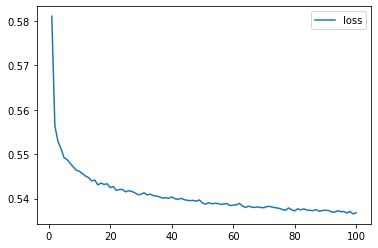

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

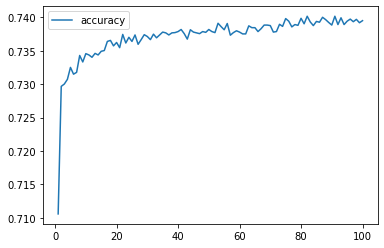

In [23]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [24]:
nn.save("AlphabetSoupCharity.h5")

In [25]:
# Import the model to a new object 
nn_imported = tf.keras.models.load_model('AlphabetSoupCharity.h5')

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5543 - accuracy: 0.7261
Loss: 0.5542507171630859, Accuracy: 0.726064145565033
